In [25]:
import pyswarms as ps
import psopy
import math
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


In [26]:

# Import modules
import numpy as np

# Import sphere function as objective function

# Import backend modules
import pyswarms.backend as P
from pyswarms.backend.topology import Star

import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt
from pyswarms.utils.plotters.formatters import Mesher, Designer

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 22])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Datframe

In [27]:
df = pd.read_csv('data/icr-nliq-computer-science.csv')
df = df.fillna(0)
df['ICR'] = df['ICR'].replace(0,0.01)
df

,Institute,Articles,Articles w/ IC,Total Citations,Parent Country Citations,ICR,NLIQ,Ranking
0,Yale University,139,38,2698,1122,0.447413,0.584136,8
1,Brown University,113,32,2381,1027,0.487884,0.568669,53
2,Boston University,135,37,4170,1740,0.490636,0.582734,61
3,University of Groningen,108,31,1901,308,0.490845,0.837980,73
4,Humboldt University of Berlin,113,29,2930,697,0.590844,0.762116,74
...,...,...,...,...,...,...,...,...
70,University of Baghdad,8,2,341,15,0.473333,0.956012,801-1000
71,Hanoi University of Science & Technology,15,10,160,8,0.683347,0.950000,801-1000
72,University of Puerto Rico,16,10,668,161,0.441312,0.758982,801-1000
73,Atilim University,31,6,416,85,0.638889,0.795673,801-1000


# CES function

In [65]:
class Q:
    def setparams(self,alpha=0.5,eta=1,K=0.306173,L=0.388889):
        self.K = K
        self.L = L
        self.alpha = alpha
        self.eta = eta
        
    def Q(self,rho):
        q1 = (self.alpha * self.K**rho) + (1 - self.alpha)*(self.L**rho)
        q = q1 ** (self.eta/rho)
        return q

    def Q1(self,rho):
        q = self.Q(rho)
        if (self.K**self.alpha)*(self.L**(1-self.alpha)) == 0:
            return 0
        q1_1 = q ** (-rho/self.eta) * math.log( (self.K**self.alpha)*(self.L**(1-self.alpha)) )
        if q == 0:
            return 0
        q1 = q1_1 / math.log(q)
        return q1
    
    def Q1_new(self,rho):
        r = (self.alpha * self.K**rho) + (1 - self.alpha)*(self.L**rho)
        q1 = self.K**(self.alpha*self.K**rho) * self.L**((1-self.alpha)*self.L**rho)
        res = ( (self.Q(rho)*self.eta) / (r*rho) ) * math.log(q1/(r**(r/rho)))
        return res
        
q =Q()
q.setparams(K=0.3061728395, L=0.38888888899999996,alpha=0.5)
def f(x):
    l,r = x.shape
    F = []
    for i in range(l):
        temp = []
        for j in range(r):
            #t = x[i][j]*math.sin(math.pi*x[i][j]*10)+1.0
            t = q.Q(x[i][j]) 
            #temp.append(t)
        F.append(t)
    #print(F)
    return np.array(F)

In [66]:
q.Q(0.10114881)

0.34531076902733304

# PSO optimization using inbuilt pySwarm

2020-05-28 02:52:06,921 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}


pyswarms.single.global_best:   0%|          |0/100

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0

0.4474134631 0.5841363973




pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.511

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.511

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.511

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.511

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.511

pyswarms.single.global_best:  91%|█████████ |91/100, best_cost=0.511

pyswarms.single.global_best:  91%|█████████ |91/100, best_cost=0.511

pyswarms.single.global_best:  91%|█████████ |91/100, best_cost=0.511

pyswarms.single.global_best:  91%|█████████ |91/100, best_cost=0.511

pyswarms.single.global_best:  91%|█████████ |91/100, best_cost=0.511

pyswarms.single.global_best:  91%|█████████ |91/100, best_cost=0.511

pyswarms.single.global_best:  91%|█████████ |91/100, best_cost=0.511

pyswarms.single.global_best:  91%|█████████ |91/100, best_cost=0.511

pyswarms.single.global_best:  91%|█████████ |91/100, best_cost=0.511

pyswarms.single.gl

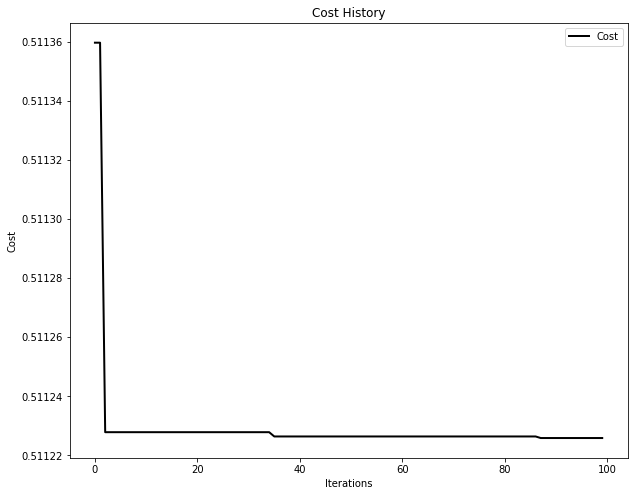

In [102]:
print(q.K,q.L)
q.setparams(K=df['ICR'][0],L=df['NLIQ'][0],alpha=0.5)
max_bound = 1.0 * np.ones(1)
min_bound = 0.0 * np.ones(1)
bounds = (min_bound, max_bound)
# Set-up optimizer
options = {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=1, options=options, bounds=bounds)
optimizer.optimize(f, iters=100)
# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.savefig('cost.png')
plt.show()


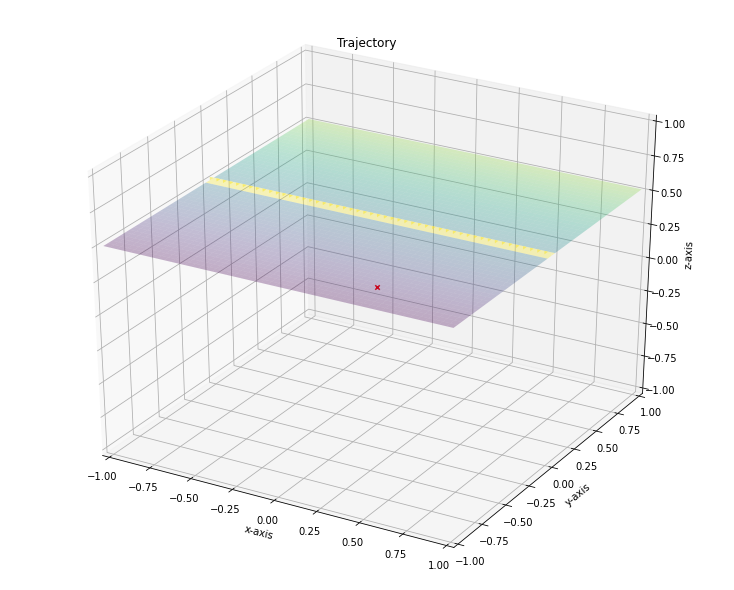

In [103]:
from IPython.display import HTML
%matplotlib inline
import matplotlib.animation# Plot the sphere function's mesh for better plots
m = Mesher(func=f,
           #limits=[(-1,1), (-1,1)]
          )
# Adjust figure limits
d = Designer(
    #limits=[(-1,1), (-1,1), (-0.1,1)],
             label=['x-axis', 'y-axis', 'z-axis'])

pos_history_3d = m.compute_history_3d(optimizer.pos_history) # preprocessing
animation3d = plot_surface(pos_history=pos_history_3d,
                           mesher=m, designer=d,
                           mark=(0,0,0))   
plt.savefig('cost3D.png')
plt.show()

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot([0,2*np.pi],[-1,1])

animate = lambda i: l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
help(ani.to_html5_video())

2020-05-28 02:02:48,883 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2020-05-28 02:02:48,886 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 432x288 -pix_fmt rgba -r 5.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/yy/1mdqj2p5327cp4kq5d1f69200000gp/T/tmpmu_2g23u/temp.m4v
2020-05-28 02:02:49,022 - matplotlib.animation - WARNING - MovieWriter stderr:
[h264_videotoolbox @ 0x7fad33809a00] Error: cannot create compression session: -12915
[h264_videotoolbox @ 0x7fad33809a00] Try -allow_sw 1. The hardware encoder may be busy, or not supported.
Error initializing output stream 0:0 -- Error while opening encoder for output stream #0:0 - maybe incorrect parameters such as bit_rate, rate, width or height



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '5.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/var/folders/yy/1mdqj2p5327cp4kq5d1f69200000gp/T/tmpmu_2g23u/temp.m4v']' returned non-zero exit status 1.

# Cost for each datapoint

In [109]:
# Set constraints and options Internationality(rho>1)
max_bound = 1 * np.ones(1)
min_bound = 0 * np.ones(1)
bounds = (min_bound,max_bound)
options = {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
print(bounds)

(array([0.001]), array([0.1]))


In [ ]:
costs = []
positions = []
K =[]
L=[]
for d in range(len(df))[:]:
    q.setparams(K=df['ICR'][d],L=df['NLIQ'][d],alpha=0.5)
    print(q.K,q.L)

    # Set-up optimizer
    optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=1, options=options,bounds =bounds)
    cost,pos = optimizer.optimize(f, iters=100)
    # Plotting 2D and 3D cost history
    plot_cost_history(optimizer.cost_history)
    plt.savefig('cost_history/2D/rho>1/cost_2D_'+df['Institute'][d]+'.png')
    
    m = Mesher(func=f,limits=[(-1,1), (-1,1)])
    # Adjust figure limits
    des = Designer(limits=[(-1,1), (-1,1), (-0.1,1)],label=['x-axis', 'y-axis', 'z-axis'])
    pos_history_3d = m.compute_history_3d(optimizer.pos_history) # preprocessing
    animation3d = plot_surface(pos_history=pos_history_3d,
                               mesher=m, designer=des,
                               mark=(0,0,0))   
    plt.savefig('cost_history/3D/1>rho>0/cost_3D_'+df['Institute'][d]+'.png')
    
    while pos[0] >max_bound[0] or pos[0]<min_bound[0]:
        optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=1, options=options)
        cost,pos = optimizer.optimize(f, iters=100)
    print('Cost: %f\nPosition%f'%(cost,pos))
    # Plot the cost
    costs.append(cost)
    positions.append(pos[0])

2020-05-28 02:56:40,463 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}


pyswarms.single.global_best:   0%|          |0/100

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.511

pyswarms.single.global_best:   0%|          |0/100, best_cost=0

0.4474134631 0.5841363973




pyswarms.single.global_best:  29%|██▉       |29/100, best_cost=0.511

pyswarms.single.global_best:  29%|██▉       |29/100, best_cost=0.511

pyswarms.single.global_best:  29%|██▉       |29/100, best_cost=0.511

pyswarms.single.global_best:  29%|██▉       |29/100, best_cost=0.511

pyswarms.single.global_best:  29%|██▉       |29/100, best_cost=0.511

pyswarms.single.global_best:  29%|██▉       |29/100, best_cost=0.511

pyswarms.single.global_best:  73%|███████▎  |73/100, best_cost=0.511

pyswarms.single.global_best:  73%|███████▎  |73/100, best_cost=0.511

pyswarms.single.global_best:  73%|███████▎  |73/100, best_cost=0.511

pyswarms.single.global_best:  73%|███████▎  |73/100, best_cost=0.511

pyswarms.single.global_best:  73%|███████▎  |73/100, best_cost=0.511

pyswarms.single.global_best:  73%|███████▎  |73/100, best_cost=0.511

pyswarms.single.global_best:  73%|███████▎  |73/100, best_cost=0.511

pyswarms.single.global_best:  73%|███████▎  |73/100, best_cost=0.511

pyswarms.single.gl

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.527

pyswarms.single.glob

Cost: 0.511229
Position0.001001
0.4878838931 0.5686686266


2020-05-28 02:57:11,177 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}


pyswarms.single.global_best:   0%|          |0/100

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.535

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.535

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.535

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.535

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.535

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.535

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.535

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.535

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.535

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.535

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.535

pyswarms.single.global_best:   0%|          |0/100, best_cost=0

Cost: 0.526731
Position0.001093
0.49063601869999995 0.5827338129


pyswarms.single.global_best:  52%|█████▏    |52/100, best_cost=0.535

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.535[A
2020-05-28 02:57:11,378 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5347078839954456, best pos: [0.00109833]
2020-05-28 02:57:26,543 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}


pyswarms.single.global_best:   0%|          |0/100

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.641

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.641

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.641

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.641

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.641

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.641

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.641

pyswarms.single.global_best:   0%|          |0/100, best

Cost: 0.534708
Position0.001098
0.49084515310000004 0.8379800104999999


2020-05-28 02:57:42,515 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}


pyswarms.single.global_best:   0%|          |0/100

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.671

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.671

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.671

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.671

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.671

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.671

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.671

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.671

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.671

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.671

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.671

pyswarms.single.global_best:   0%|          |0/100, best_cost=0

Cost: 0.641365
Position0.001026
0.5908436531 0.762116041


2020-05-28 02:57:58,345 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}


pyswarms.single.global_best:   0%|          |0/100

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.558

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.558

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.558

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.558

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.558

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.558

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.558

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.558

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.558

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.558

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.558

pyswarms.single.global_best:   0%|          |0/100, best_cost=0

Cost: 0.671044
Position0.001116
0.5554567900999999 0.560311284


pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.558

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.558

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.558

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.558

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.558

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.558

pyswarms.single.global_best:  96%|█████████▌|96/100, best_cost=0.558

pyswarms.single.global_best:  96%|█████████▌|96/100, best_cost=0.558

pyswarms.single.global_best:  96%|█████████▌|96/100, best_cost=0.558

pyswarms.single.global_best:  96%|█████████▌|96/100, best_cost=0.558

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.558[A
2020-05-28 02:57:58,566 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.557878762290663, best pos: [0.00104345]
2020-05-28 02:58:14,094 - pyswarms.single.global_best - INFO - Optimize for 100 iters wi

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.582

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.582

Cost: 0.557879
Position0.001043
0.4646057237 0.7298187809000001




pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.582

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.582

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.582

pyswarms.single.global_best:  49%|████▉     |49/100, best_cost=0.582

pyswarms.single.global_best:  98%|█████████▊|98/100, best_cost=0.582

pyswarms.single.global_best:  98%|█████████▊|98/100, best_cost=0.582

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.582[A
2020-05-28 02:58:14,308 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5823192418224696, best pos: [0.00102472]
2020-05-28 02:58:29,073 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}


pyswarms.single.global_best:   0%|          |0/100

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.704

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.704

pyswarms.single.global_best:   0%|          |0/10

pyswarms.single.global_best:  56%|█████▌    |56/100, best_cost=0.704

pyswarms.single.global_best:  56%|█████▌    |56/100, best_cost=0.704

pyswarms.single.global_best:  56%|█████▌    |56/100, best_cost=0.704

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.704[A
2020-05-28 02:58:29,260 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7039767559230496, best pos: [0.00103524]


Cost: 0.582319
Position0.001025
0.5716947328 0.8668280872


2020-05-28 02:58:45,133 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}


pyswarms.single.global_best:   0%|          |0/100

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.556

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.556

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.556

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.556

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.556

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.556

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.556

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.556

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.556

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.556

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.556

pyswarms.single.global_best:   0%|          |0/100, best_cost=0

Cost: 0.703977
Position0.001035
0.5074962699000001 0.6085409253


2020-05-28 02:59:00,907 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}


pyswarms.single.global_best:   0%|          |0/100

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.569

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.569

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.569

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.569

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.569

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.569

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.569

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.569

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.569

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.569

pyswarms.single.global_best:   0%|          |0/100, best_cost=0.569

pyswarms.single.global_best:   0%|          |0/100, best_cost=0

Cost: 0.555729
Position0.001069
0.4037449775 0.8026819923




pyswarms.single.global_best:  42%|████▏     |42/100, best_cost=0.569

pyswarms.single.global_best:  42%|████▏     |42/100, best_cost=0.569

pyswarms.single.global_best:  42%|████▏     |42/100, best_cost=0.569

pyswarms.single.global_best:  42%|████▏     |42/100, best_cost=0.569

pyswarms.single.global_best:  82%|████████▏ |82/100, best_cost=0.569

pyswarms.single.global_best:  82%|████████▏ |82/100, best_cost=0.569

pyswarms.single.global_best:  82%|████████▏ |82/100, best_cost=0.569

pyswarms.single.global_best:  82%|████████▏ |82/100, best_cost=0.569

pyswarms.single.global_best:  82%|████████▏ |82/100, best_cost=0.569

pyswarms.single.global_best:  82%|████████▏ |82/100, best_cost=0.569

pyswarms.single.global_best:  82%|████████▏ |82/100, best_cost=0.569

pyswarms.single.global_best:  82%|████████▏ |82/100, best_cost=0.569

pyswarms.single.global_best:  82%|████████▏ |82/100, best_cost=0.569

pyswarms.single.global_best:  82%|████████▏ |82/100, best_cost=0.569

pyswarms.single.gl

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

Cost: 0.569316
Position0.001105
0.4722488996 0.6887886598




pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  47%|████▋     |47/100, best_cost=0.57

pyswarms.single.global_best:  97%|█████████▋|97/100, best_cost=0.57

pyswarms.single.global_best:  97%|█████████▋|97/100, best_cost=0.57

pyswarms.single.global_best:  97%|█████████▋|97/100, best_cost=0.57

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.57[A
2020-05-28 02:59:17,279 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5703433470897619, best pos: [0.00102266]
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.701

pyswarms.single.glob

Cost: 0.570343
Position0.001023
0.5642211965 0.871850252




pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.701[A
2020-05-28 02:59:33,106 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7013844805776798, best pos: [0.0010218]
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(1, 1, figsize=designer.figsize)
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the r

pyswarms.single.global_best:  56%|█████▌    |56/100, best_cost=0.542

pyswarms.single.global_best:  56%|█████▌    |56/100, best_cost=0.542

pyswarms.single.global_best:  56%|█████▌    |56/100, best_cost=0.542

pyswarms.single.global_best:  56%|█████▌    |56/100, best_cost=0.542

pyswarms.single.global_best:  56%|█████▌    |56/100, best_cost=0.542

pyswarms.single.global_best:  56%|█████▌    |56/100, best_cost=0.542

pyswarms.single.global_best:  56%|█████▌    |56/100, best_cost=0.542

pyswarms.single.global_best:  56%|█████▌    |56/100, best_cost=0.542

pyswarms.single.global_best:  56%|█████▌    |56/100, best_cost=0.542

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.542[A
2020-05-28 02:59:48,079 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5424534890547927, best pos: [0.00102429]


Cost: 0.701384
Position0.001022
0.5377777778 0.5471698113


/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(1, 1, figsize=designer.figsize)
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=designer.figsize)
2020-05-28 03:00:03,889 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.67

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.67

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.67

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.67

pyswarms.single.global_best:  55%|█████▌    |55/100, best_cost=0.67

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.67[A
2020-05-28 03:00:04,064 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.6697062268750723, best pos: [0.00100677]


Cost: 0.542453
Position0.001024
0.484691615 0.9252465483


/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(1, 1, figsize=designer.figsize)
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=designer.figsize)
2020-05-28 03:00:23,199 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9

Cost: 0.669706
Position0.001007
0.46719743700000005 0.8469184891


pyswarms.single.global_best:  44%|████▍     |44/100, best_cost=0.629

pyswarms.single.global_best:  44%|████▍     |44/100, best_cost=0.629

pyswarms.single.global_best:  44%|████▍     |44/100, best_cost=0.629

pyswarms.single.global_best:  44%|████▍     |44/100, best_cost=0.629

pyswarms.single.global_best:  92%|█████████▏|92/100, best_cost=0.629

pyswarms.single.global_best:  92%|█████████▏|92/100, best_cost=0.629

pyswarms.single.global_best:  92%|█████████▏|92/100, best_cost=0.629

pyswarms.single.global_best:  92%|█████████▏|92/100, best_cost=0.629

pyswarms.single.global_best:  92%|█████████▏|92/100, best_cost=0.629

pyswarms.single.global_best:  92%|█████████▏|92/100, best_cost=0.629

pyswarms.single.global_best:  92%|█████████▏|92/100, best_cost=0.629

pyswarms.single.global_best:  92%|█████████▏|92/100, best_cost=0.629

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.629[A
2020-05-28 03:00:23,426 - pyswarms.single.global_best - INFO - Optimization finished | b

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.global_best:  69%|██████▉   |69/100, best_cost=0.684

pyswarms.single.glob

Cost: 0.629057
Position0.001002
0.5684712516 0.8235002479000001


/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(1, 1, figsize=designer.figsize)
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=designer.figsize)
2020-05-28 03:00:57,295 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9

pyswarms.single.global_best:  61%|██████    |61/100, best_cost=0.637

pyswarms.single.global_best:  61%|██████    |61/100, best_cost=0.637

pyswarms.single.global_best:  61%|██████    |61/100, best_cost=0.637

pyswarms.single.global_best:  61%|██████    |61/100, best_cost=0.637

pyswarms.single.global_best:  61%|██████    |61/100, best_cost=0.637

pyswarms.single.global_best:  61%|██████    |61/100, best_cost=0.637

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.637[A
2020-05-28 03:00:57,466 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.6367904621495535, best pos: [0.00100325]


Cost: 0.684217
Position0.001054
0.4775185428 0.8491155047


/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(1, 1, figsize=designer.figsize)
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=designer.figsize)
2020-05-28 03:01:13,442 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9

Cost: 0.636790
Position0.001003
0.4958996212 0.5536277603




pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.524

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.524

pyswarms.single.global_best:  48%|████▊     |48/100, best_cost=0.524

pyswarms.single.global_best:  93%|█████████▎|93/100, best_cost=0.524

pyswarms.single.global_best:  93%|█████████▎|93/100, best_cost=0.524

pyswarms.single.global_best:  93%|█████████▎|93/100, best_cost=0.524

pyswarms.single.global_best:  93%|█████████▎|93/100, best_cost=0.524

pyswarms.single.global_best:  93%|█████████▎|93/100, best_cost=0.524

pyswarms.single.global_best:  93%|█████████▎|93/100, best_cost=0.524

pyswarms.single.global_best:  93%|█████████▎|93/100, best_cost=0.524

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.524[A
2020-05-28 03:01:13,663 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5239700788435357, best pos: [0.00101755]
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/uti

In [21]:
df['rho>1'] =positions
df['Internationality(rho>1'] = costs
df

,Institute,Articles,Articles w/ IC,Total Citations,Parent Country Citations,ICR,NLIQ,Ranking,1>rho>0,Internationality(1>rho>0,0.1>rho>0.001,Internationality(0.1>rho>0.001,0.99>rho>0.9,Internationality(0.99>rho>0.9,0.9>rho>0.101,Internationality(0.9>rho>0.101,rho>1,Internationality(rho>1
0,Yale University,139,38,2698,1122,0.447413,0.584136,8,0.000701,0.511228,0.001026,0.511229,0.900103,0.515321,0.101045,0.511684,12807.607770,0.000000
1,Brown University,113,32,2381,1027,0.487884,0.568669,53,0.000950,0.526731,0.001050,0.526731,0.900003,0.528122,0.101632,0.526887,96662.076040,0.000000
2,Boston University,135,37,4170,1740,0.490636,0.582734,61,0.000394,0.534706,0.001051,0.534708,0.900019,0.536487,0.101004,0.534906,32685.899073,0.000000
3,University of Groningen,108,31,1901,308,0.490845,0.837980,73,0.000146,0.641344,0.001078,0.641366,0.900032,0.662116,0.101073,0.643663,90607.933466,0.000000
4,Humboldt University of Berlin,113,29,2930,697,0.590844,0.762116,74,0.000320,0.671039,0.001015,0.671043,0.900028,0.675936,0.102083,0.671593,50440.424860,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,University of Baghdad,8,2,341,15,0.473333,0.956012,801-1000,0.000244,0.672700,0.001035,0.672733,0.900008,0.710505,0.101663,0.676927,82873.805043,0.000000
71,Hanoi University of Science & Technology,15,10,160,8,0.683347,0.950000,801-1000,0.000484,0.805722,0.001025,0.805728,0.900001,0.815580,0.101054,0.806822,14594.578722,0.000000
72,University of Puerto Rico,16,10,668,161,0.441312,0.758982,801-1000,0.000229,0.578752,0.001062,0.578770,0.900066,0.598018,0.101280,0.580905,35698.394658,0.000000
73,Atilim University,31,6,416,85,0.638889,0.795673,801-1000,0.000112,0.712985,0.001055,0.712989,0.900021,0.716852,0.101162,0.713419,66718.161750,0.000000


In [23]:
df.to_csv('result/result_alpha_0.5.csv',index=False)

In [460]:
df[df['Institute'].isin(['Simon Fraser University','Indian Institute of Technology (IIT) - Kharagpur'])]

,Institute,Articles,Articles w/ IC,Total Citations,Parent Country Citations,ICR,NLIQ,Ranking,cost,rho,Internationality(1>rho>0),Internationality(0.1>rho>0.001),Internationality(0.99>rho>0.9),Internationality(0.9>rho>0.101),Internationality(rho>1),Internationality(1rho>0)
22,Indian Institute of Technology (IIT) - Kharagpur,32,8,262,49,0.463333,0.812977,0.0,0.768536,0.000730,0.768531,0.768540,0.777186,0.769618,0.0,0.768536
32,Simon Fraser University,66,15,593,97,0.462083,0.836425,60.0,0.788240,0.000277,0.788256,0.788249,0.798060,0.789484,0.0,0.788240


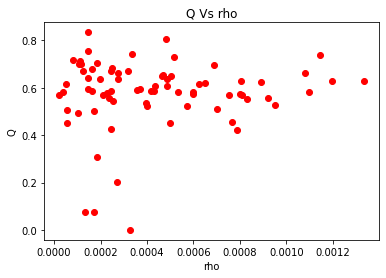

In [24]:
temp =df
temp = temp.sort_values(by=['1>rho>0'])
#print(temp)
x = temp['1>rho>0']
y = temp['Internationality(1>rho>0']

fig=plt.figure()
#ax=fig.add_axes([0,0,1,1])
plt.scatter(x, y, color='r')

plt.xlabel('rho')
plt.ylabel("Q")
plt.title('Q Vs rho')
plt.savefig('qVSrho.png')



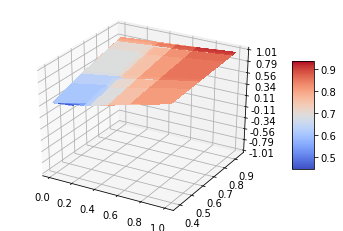

In [469]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = temp['ICR']
#X = np.arange(-5, 5, 1)
Y = temp['NLIQ']
#Y = np.arange(-5, 5, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print()
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Graphs for different ranges of rho

In [410]:
r = (0.00001,1)

In [472]:
i = r[0]
rho = []
inter = []
Q1 =[]
Q1_new=[]
k=df['ICR'][4]
l=df['NLIQ'][4]
q.setparams(K=k,L=l)
while i<r[1]:
    inter.append(q.Q(i))
    Q1.append(q.Q1(i))
    Q1_new.append(q.Q1_new(i))
    rho.append(i)
    i+=.001

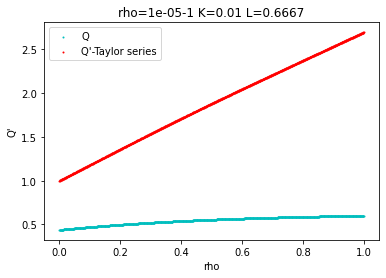

In [473]:
x = rho
y = inter

fig=plt.figure()
#ax=fig.add_axes([0,0,1,1])
plt.scatter(x, y, color='c',s=1,label='Q')
plt.scatter(x, Q1, color='r',s=1,label='Q\'-Taylor series')
#plt.scatter(x, Q1_new, color='g',s=1,label='Q\'-Chain Rule')
plt.xlabel('rho')
plt.ylabel("Q\'")
plt.legend()
plt.title('rho='+str(r[0])+'-'+str(r[1]) +' K='+ str(round(k,4))+' L='+ str(round(l,4)))
plt.savefig('graphs/'+str(round(k,2))+'-'+str(round(l,2))+'.png')

In [454]:
temp

,Institute,Articles,Articles w/ IC,Total Citations,Parent Country Citations,ICR,NLIQ,Ranking,cost,rho,Internationality(1>rho>0),Internationality(0.1>rho>0.001),Internationality(0.99>rho>0.9),Internationality(0.9>rho>0.101),Internationality(rho>1)
9,Auburn University,7,1,52,7,1.000000,0.865385,0.0,0.972104,81.382115,0.877988,0.877988,0.878757,0.878071,0.972104
35,University of British Columbia,85,26,1642,147,0.375978,0.910475,52.0,0.000000,32750.036931,0.833417,0.833438,0.855123,0.836306,0.000000
49,Yonsei University,41,5,250,66,0.243333,0.736000,0.0,0.000000,41484.489355,0.658899,0.658922,0.684608,0.662475,0.000000
10,Australian National University,56,20,1901,137,0.492913,0.927933,41.0,0.000000,42614.120342,0.871081,0.871065,0.883283,0.872608,0.000000
23,Indian Institute of Technology (IIT) - Madras,37,7,329,53,0.557143,0.838906,177.0,0.000000,45084.598449,0.805265,0.805271,0.810235,0.805872,0.000000
20,Indian Institute of Technology (IIT) - Bombay,11,0,230,20,0.010000,0.913043,0.0,0.000000,118926.313562,0.581702,0.581931,0.813900,0.631304,0.000000
36,University of Edinburgh,83,34,860,51,0.280757,0.940698,30.0,0.000000,135708.363613,0.833565,0.833619,0.871647,0.838991,0.000000
12,Benemerita Universidad Autonoma de Puebla,15,2,45,14,0.270833,0.688889,0.0,0.000000,144665.339288,0.627489,0.627512,0.645523,0.629917,0.000000
6,Ankara University,3,2,12,2,0.284375,0.833333,0.0,0.000000,158454.860528,0.748396,0.748426,0.776126,0.752226,0.000000
11,Babes Bolyai University from Cluj,7,2,28,5,0.322917,0.821429,0.0,0.000000,162705.982772,0.748227,0.748237,0.769719,0.751114,0.000000


# IGNORE

In [413]:
max_bound = 1.0 * np.ones(1)
min_bound = 0*max_bound
bounds = (min_bound, max_bound)

my_topology = Star() # The Topology Class
my_options = {'c1': 0.6, 'c2': 0.3, 'w': 0.9} # arbitrarily set
my_swarm = P.create_swarm(n_particles=100, dimensions=1, options=my_options,bounds=bounds) # The Swarm Class

print('The following are the attributes of our swarm: {}'.format(my_swarm.__dict__.keys()))

The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])


In [512]:

iterations = 100 # Set 100 iterations
costs = []
positions = []
K =[]
L=[]
for d in range(len(df)):
    q.setparams(K=df['ICR'][d],L=df['NLIQ'][d])
    print(q.K,q.L)
    
    my_swarm = P.create_swarm(n_particles=5, dimensions=1, options=my_options,bounds=bounds) # The Swarm Class
    print('The following are the attributes of our swarm: {}'.format(my_swarm.__dict__.keys()))
    for i in range(iterations):
        # Part 1: Update personal best
        my_swarm.current_cost = f(my_swarm.position) # Compute current cost
        #print(my_swarm.current_cost)
        my_swarm.pbest_cost = f(my_swarm.pbest_pos)  # Compute personal best pos
        my_swarm.pbest_pos, my_swarm.pbest_cost = P.compute_pbest(my_swarm) # Update and store

        # Part 2: Update global best
        # Note that gbest computation is dependent on your topology
        if np.min(my_swarm.pbest_cost) < my_swarm.best_cost:
            my_swarm.best_pos, my_swarm.best_cost = my_topology.compute_gbest(my_swarm)

        # Let's print our output
        if i%20==0:
            print('Iteration: {} | my_swarm.best_cost: {:.4f}'.format(i+1, my_swarm.best_cost))

        # Part 3: Update position and velocity matrices
        # Note that position and velocity updates are dependent on your topology
        my_swarm.velocity = my_topology.compute_velocity(my_swarm)
        my_swarm.position = my_topology.compute_position(my_swarm)
        
    print('The best cost found by our swarm is: {:.4f}'.format(my_swarm.best_cost))
    costs.append(my_swarm.best_cost)
    print('The best position found by our swarm is: {}'.format(my_swarm.best_pos))
    positions.append(my_swarm.best_pos[0])

0.3061728395 0.38888888899999996
The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])
Iteration: 1 | my_swarm.best_cost: 1.1342
Iteration: 21 | my_swarm.best_cost: 0.0062
Iteration: 41 | my_swarm.best_cost: 0.0001
Iteration: 61 | my_swarm.best_cost: 0.0000
Iteration: 81 | my_swarm.best_cost: 0.0000
The best cost found by our swarm is: 0.0000
The best position found by our swarm is: [-13.73086102]
0.6666666667 0.77027027
The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])
Iteration: 1 | my_swarm.best_cost: 1.0271
Iteration: 21 | my_swarm.best_cost: 0.1839
Iteration: 41 | my_swarm.best_cost: 0.0425
Iteration: 61 | my_swarm.best_cost: 0.0209
Iteration: 81 | my_swarm.best_cost: 0.0128
The best cost found by our swarm 

/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':



Iteration: 61 | my_swarm.best_cost: 0.0000
Iteration: 81 | my_swarm.best_cost: 0.0000
The best cost found by our swarm is: 0.0000
The best position found by our swarm is: [-64.16211562]
0.0 0.609631728
The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])
Iteration: 1 | my_swarm.best_cost: 0.0000
Iteration: 21 | my_swarm.best_cost: 0.0000
Iteration: 41 | my_swarm.best_cost: 0.0000
Iteration: 61 | my_swarm.best_cost: 0.0000
Iteration: 81 | my_swarm.best_cost: 0.0000
The best cost found by our swarm is: 0.0000
The best position found by our swarm is: [0.31044877]
0.0 0.9107142859999999
The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])
Iteration: 1 | my_swarm.best_cost: 0.0000
Iteration: 21 | my_swarm.best_cost: 0.

The best cost found by our swarm is: 0.0017
The best position found by our swarm is: [-28.06314421]
0.0 0.756448989
The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])
Iteration: 1 | my_swarm.best_cost: 0.0000
Iteration: 21 | my_swarm.best_cost: 0.0000
Iteration: 41 | my_swarm.best_cost: 0.0000
Iteration: 61 | my_swarm.best_cost: 0.0000
Iteration: 81 | my_swarm.best_cost: 0.0000
The best cost found by our swarm is: 0.0000
The best position found by our swarm is: [0.38464782]
0.0 0.84965035
The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])
Iteration: 1 | my_swarm.best_cost: 0.0000
Iteration: 21 | my_swarm.best_cost: 0.0000
Iteration: 41 | my_swarm.best_cost: 0.0000
Iteration: 61 | my_swarm.best_cost: 0.0000
Iter

In [408]:
df = pd.read_csv("result/combined_v1.csv")

In [409]:
df

,Institute,Articles,Articles w/ IC,Total Citations,Parent Country Citations,ICR,NLIQ,cost,rho,Internationality(1>rho>0),Internationality(0.1>rho>0.001),Internationality(0.9>rho>0.101),Internationality(0.99>rho>0.9),Internationality(rho>1)
0,AGH University of Science & Technology,29,3.0,54,33,0.306173,0.388889,0.379700,0.000935,0.379700,0.379700,0.379798,0.380531,0.000000
1,Al Azhar University,5,1.0,74,17,0.666667,0.770270,0.759224,0.000602,0.759224,0.759224,0.759296,0.759844,0.000000
2,Al-Imam Muhammad Ibn Saud Islamic University,2,0.0,7,2,0.010000,0.714286,0.466182,0.000198,0.466182,0.466506,0.501927,0.637059,0.000000
3,Alexandria University,5,2.0,46,3,0.583333,0.934783,0.891727,0.000108,0.891727,0.891738,0.892616,0.898932,0.000000
4,Amity University,3,0.0,3,1,0.010000,0.666667,0.438076,0.000092,0.438076,0.438398,0.470684,0.594689,0.000000
5,Amrita Vishwa Vidyapeetham,4,0.0,10,1,0.010000,0.900000,0.574046,0.000325,0.574046,0.574401,0.622875,0.802306,0.000000
6,Ankara University,3,2.0,12,2,0.284375,0.833333,0.748437,0.001301,0.748437,0.748430,0.752218,0.776128,0.000000
7,Aoyama Gakuin University,15,0.0,29,6,0.010000,0.793103,0.512532,0.000868,0.512532,0.512665,0.553580,0.707194,0.000000
8,Arizona State University,80,19.0,558,189,0.387015,0.661290,0.626802,0.000779,0.626802,0.626803,0.627603,0.633242,0.000000
9,Auburn University,7,1.0,52,7,1.000000,0.865385,0.877988,0.000516,0.877988,0.877988,0.878071,0.878757,0.998103


In [598]:
len(positions)

50

In [618]:
np.nan

nan